Hola a todos! 

El resumen de lo que hago en este proyecto es el siguiente:

Crear un dos dataframes desde 0 en MySQL, en estos dataframes se encuentran las estadisiticas que promediaron en su año rookie y su año prime varios jugadores de la NBA tanto historicos como actuales.

La intención es comparar las estadisticas del año rookie de los jugadores con su año prime, de esta manera poder hacer un modelo predictivo con el cual añadiendole los datos de un nuevo jugador (En nuestro caso sera "Victor Wembanyama") podamos predecir que estadisticas podría llegar a promediar en su año prime.

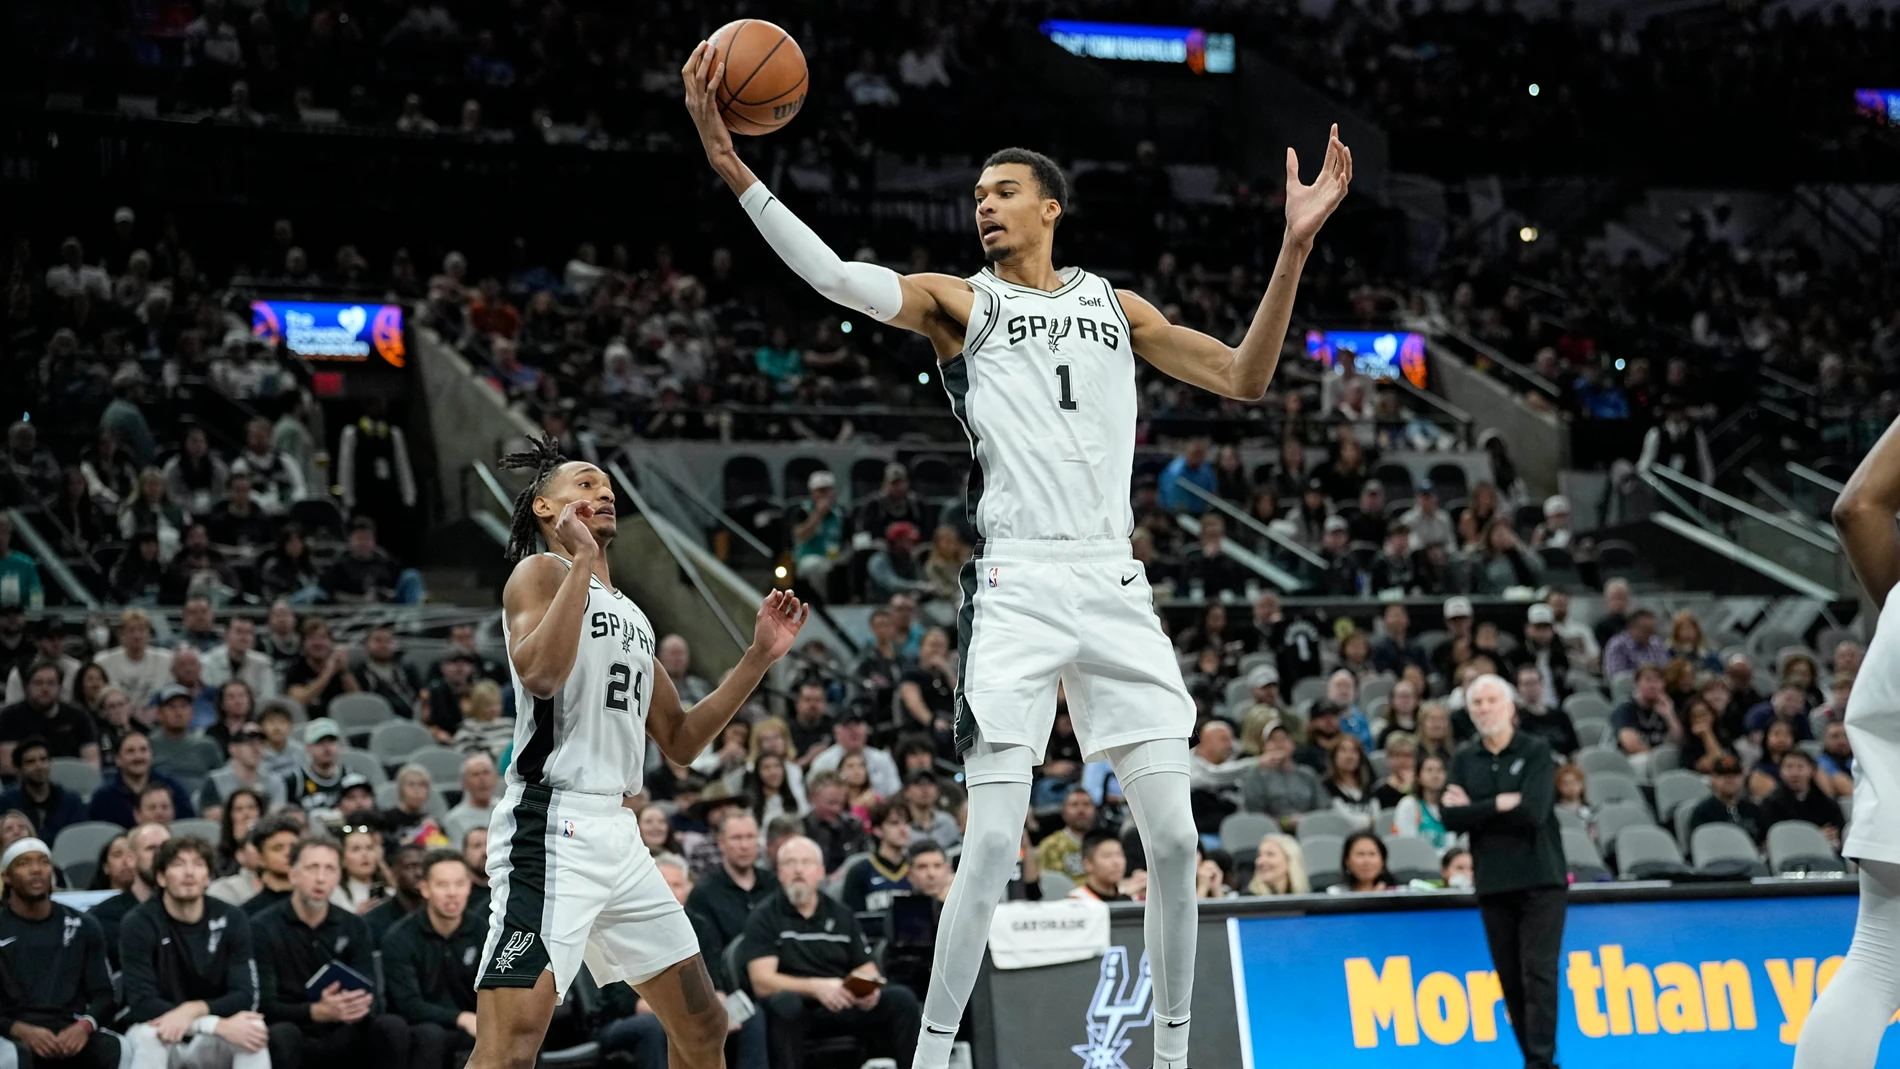

In [13]:
from IPython.display import Image, display, HTML

# Especifica el directorio de la imagen
directorio_imagen = "E:/VSC/TFM BIG DATA MEDAC/PROYECTO/images"
nombre_imagen = "wemby1.jpg"

# Construye la ruta completa a la imagen
ruta_completa_imagen = os.path.join(directorio_imagen, nombre_imagen)

# Muestra la imagen
display(Image(filename=ruta_completa_imagen))

# Código para ocultar esta celda
display(HTML('''
    <style>
        .jp-InputArea { display: none; }
    </style>
'''))

In [14]:
import pandas as pd

# Leo los archivos CSV
rookie_year = pd.read_csv("nba_rookies.csv", delimiter=";")
prime_year = pd.read_csv("nba_best_seasons.csv", delimiter=";")

columns_variable = ["player_id", "Nombre", "Temporada", "Equipo", "Puntos_por_Partido", "Rebotes_por_Partido", "Asistencias_por_Partido", "Tapones_por_Partido", "Robos_por_Partido", "Porcentaje_Tiros_Campo"]

# Asigno nombres de columnas
rookie_year.columns = columns_variable
prime_year.columns = columns_variable

# Establezco 'player_id' como índice
rookie_year = rookie_year.set_index("player_id")
prime_year = prime_year.set_index("player_id")

In [15]:
victor = rookie_year.loc[rookie_year["Nombre"] == "Victor Wembanyama"]
rookie_year = rookie_year.drop(victor.index)

In [16]:
pd.set_option("display.max_columns", 500)

# Carga de los datos y añado sufijos para diferenciarlos

data = rookie_year.merge(prime_year, on=["player_id", "Nombre"], suffixes=("_rookie", "_best"))

In [17]:
features = [x.replace("_best", "") for x in data.columns if "best" in x and "Temporada" not in x and "Equipo" not in x]

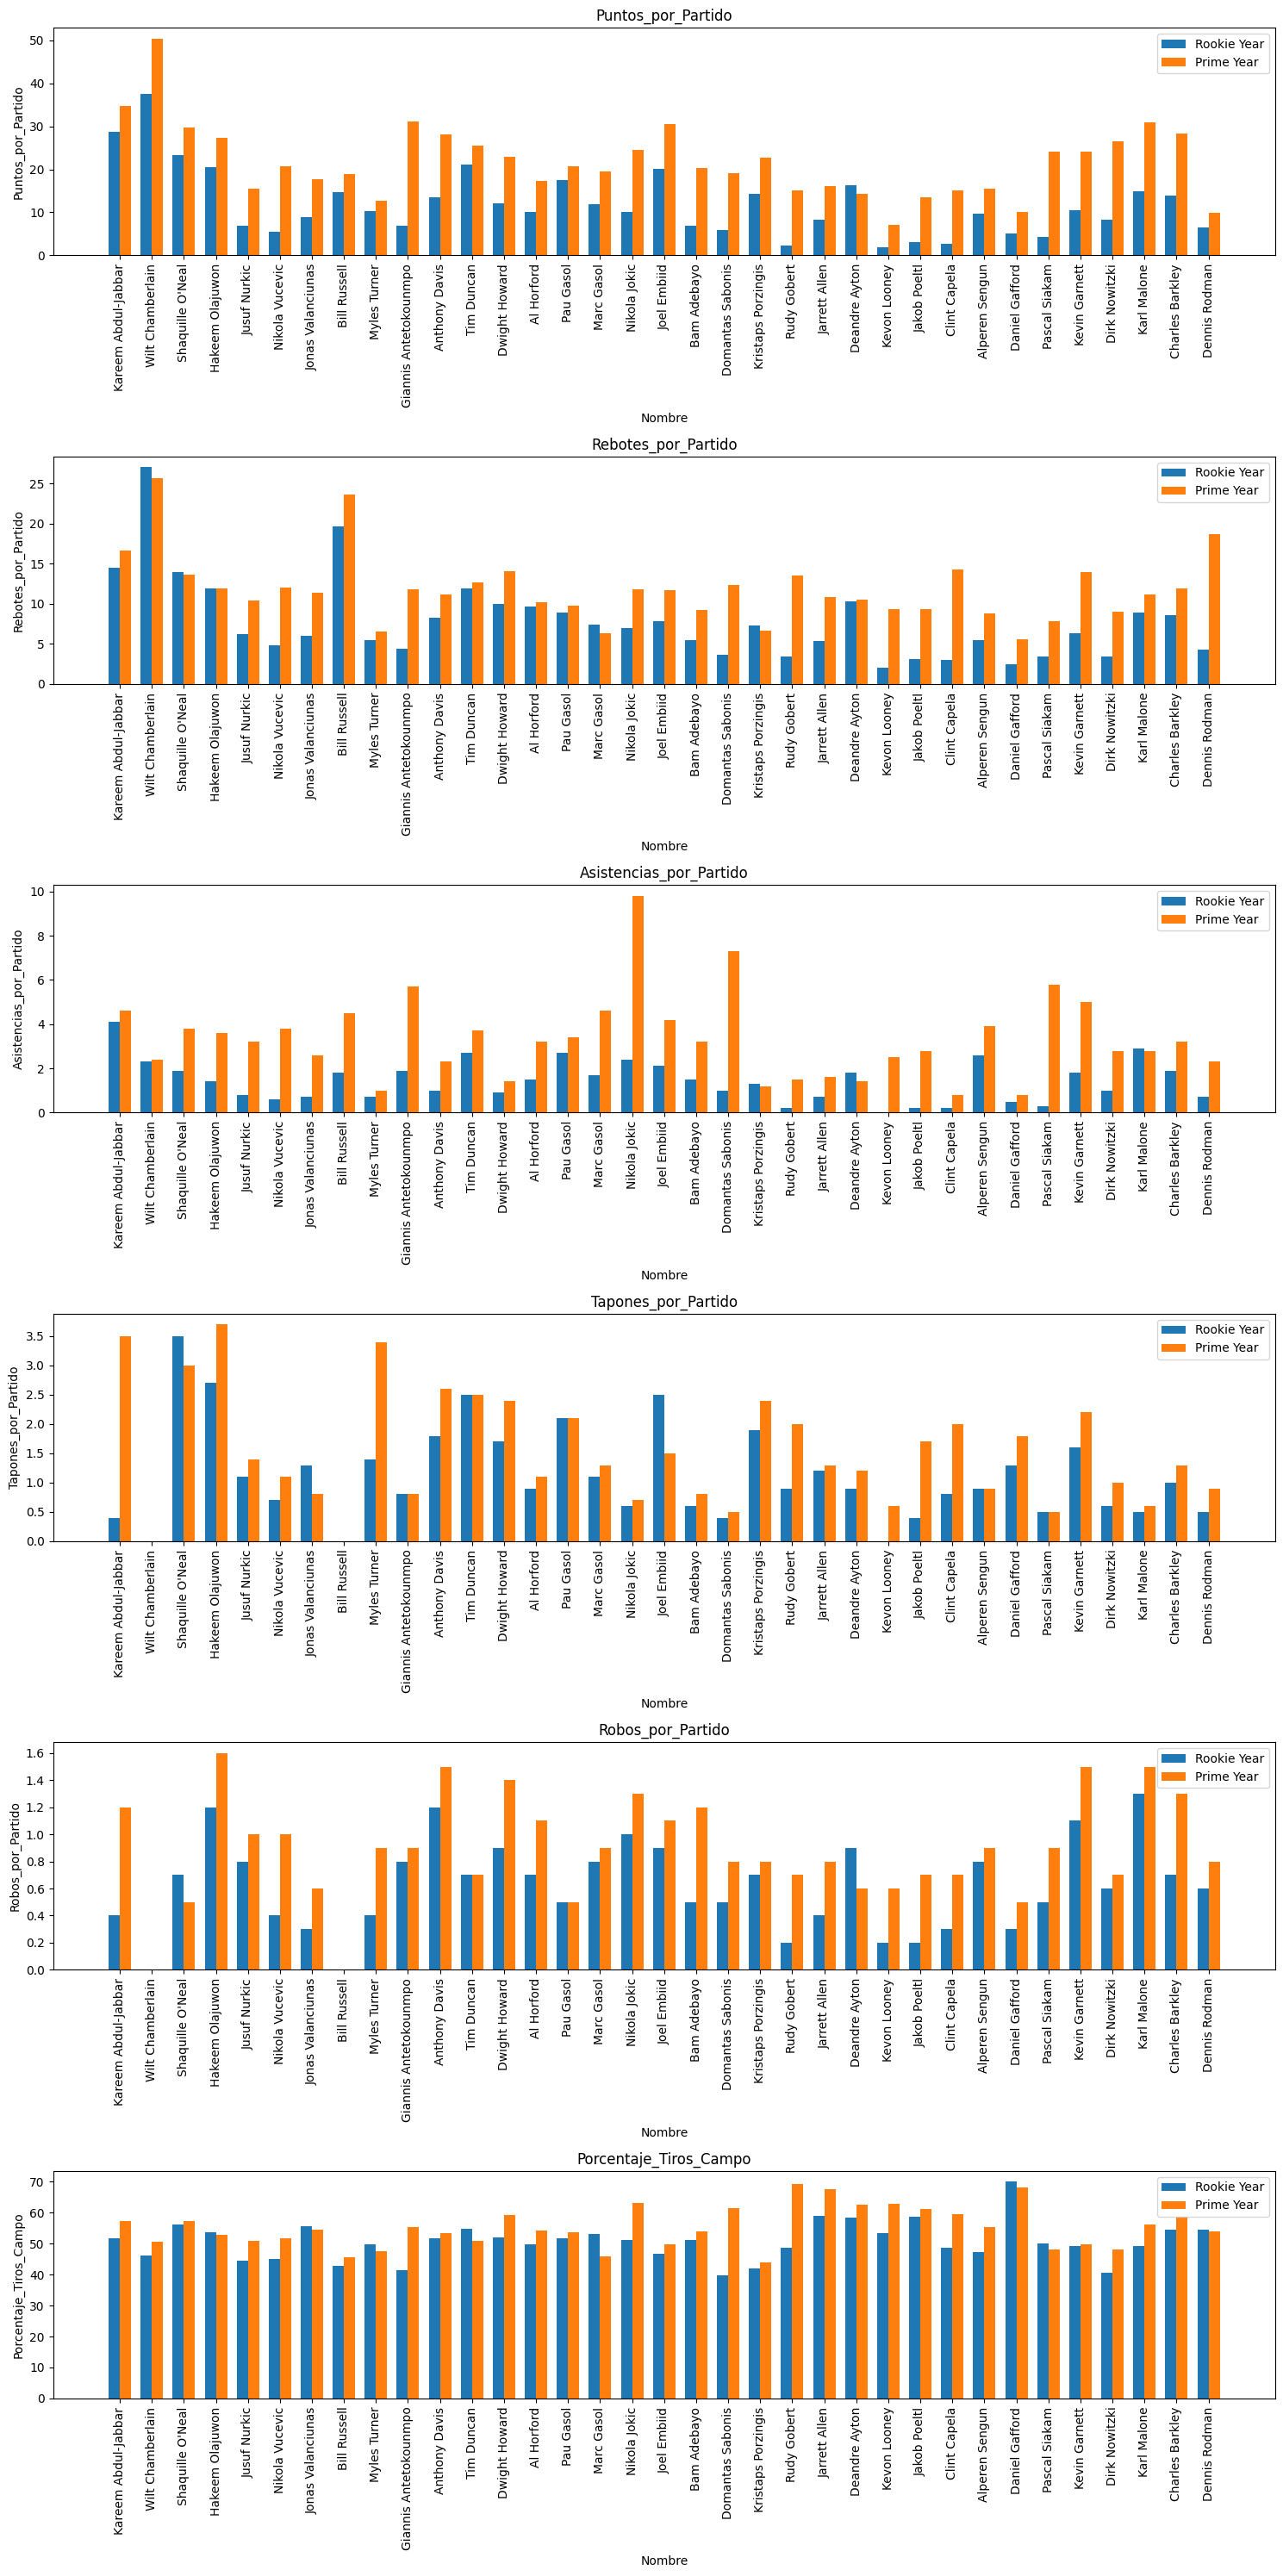

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Defino las estadisticas que quiero comparar
features = [
    "Puntos_por_Partido", 
    "Rebotes_por_Partido", 
    "Asistencias_por_Partido", 
    "Tapones_por_Partido", 
    "Robos_por_Partido", 
    "Porcentaje_Tiros_Campo"
]

# Obtengo el número de estadisticas
num_features = len(features)

# Creo una figura y ejes
fig, axs = plt.subplots(num_features, 1, figsize=(15, num_features * 5))

# AXS es un array de ejes si hay más de una estadistica
if num_features == 1:
    axs = [axs]

# Itero sobre las estadisticas y los ejes
for ax, feature in zip(axs, features):
    indices = np.arange(len(data))
    bar_width = 0.35

    rookie_bars = ax.bar(indices, data[feature + "_rookie"], bar_width, label="Rookie Year")
    best_bars = ax.bar(indices + bar_width, data[feature + "_best"], bar_width, label="Prime Year")

    # Configurar las etiquetas del eje x
    ax.set_xticks(indices + bar_width / 2)
    x_labels = data['Nombre'].tolist()

    ax.set_xticklabels(x_labels, rotation=90)
    ax.set_title(feature)
    ax.set_xlabel("Nombre")
    ax.set_ylabel(feature)
    ax.legend()

# Ajusto el layout para evitar solapamientos
plt.tight_layout()

# Muestro las graficas
plt.show()

Con el código anterior hemos **leído dos archivos CSV** ("nba_rookies.csv" y "nba_best_seasons.csv") que contienen datos de jugadores de la NBA 🏀. **Asignamos nombres a las columnas** de ambos DataFrames y **establecimos 'player_id' como índice** 🔢.

También **filtramos y eliminamos los registros** del jugador "Victor Wembanyama" del DataFrame "rookie_year", para que estos datos no afectaran a las predicciones 🚫.

Después, **configuramos las opciones de visualización de pandas** 🛠️ y **fusionamos ambos DataFrames** en uno solo, añadiendo sufijos para diferenciar las columnas de cada temporada 🔄.

**Definimos las estadísticas** que se van a comparar entre las dos temporadas (rookie y prime) 📊 y **preparamos la figura con subgráficas** para cada estadística 🖼️.

**Creamos gráficos de barras** 📈 para comparar las estadísticas seleccionadas entre las dos temporadas para cada jugador. **Configuramos las etiquetas y títulos de los gráficos**, ajustamos el diseño para evitar solapamientos, y **mostramos estos gráficos** 🎨.

En los graficos podemos observar que claramente en la mayoría de las estadísticas promediadas por cada jugador, el año rookie suele estar por debajo del año prime, aunque hay alguna en la que esto no se cumple.

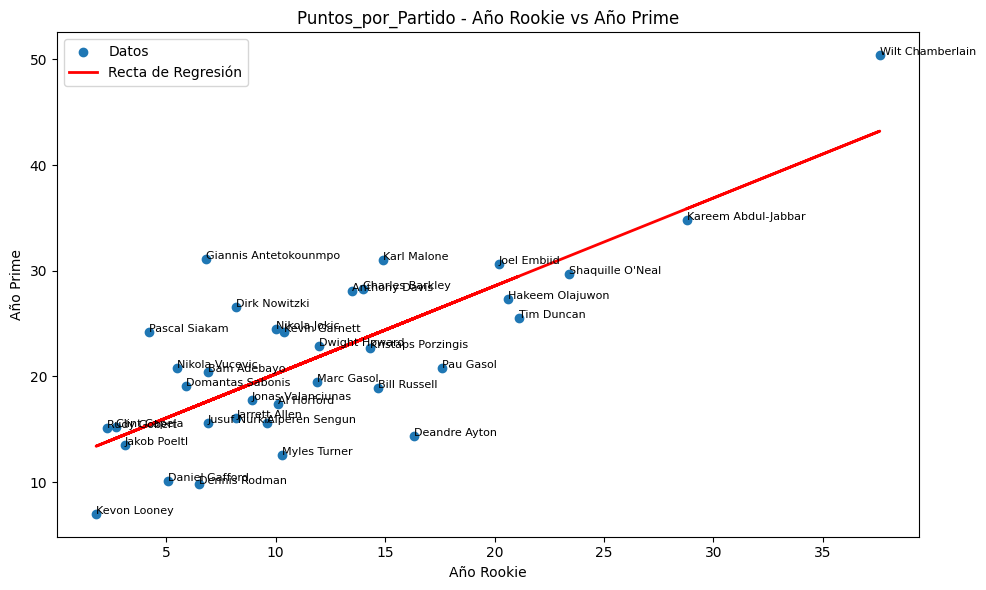

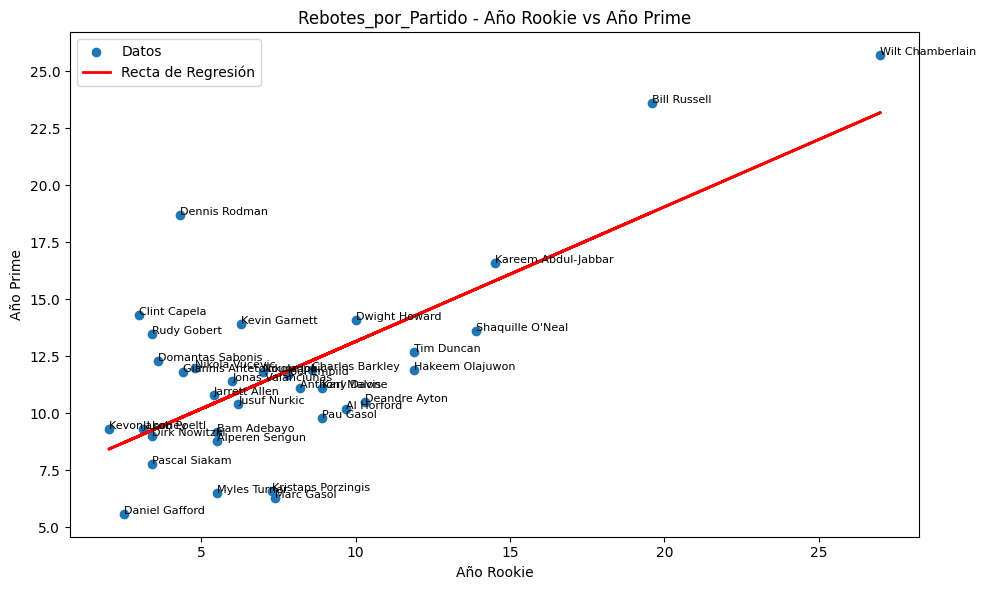

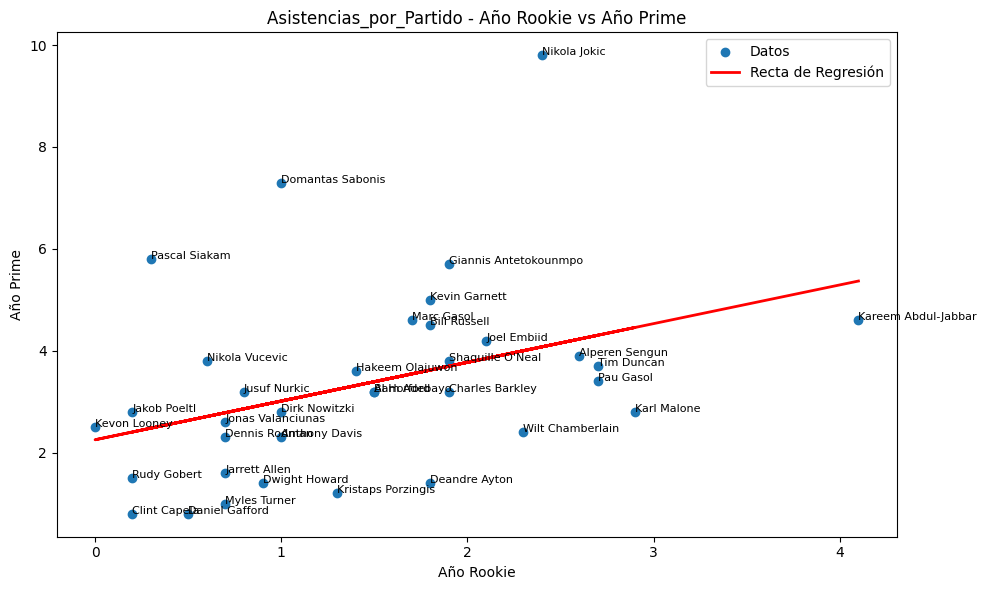

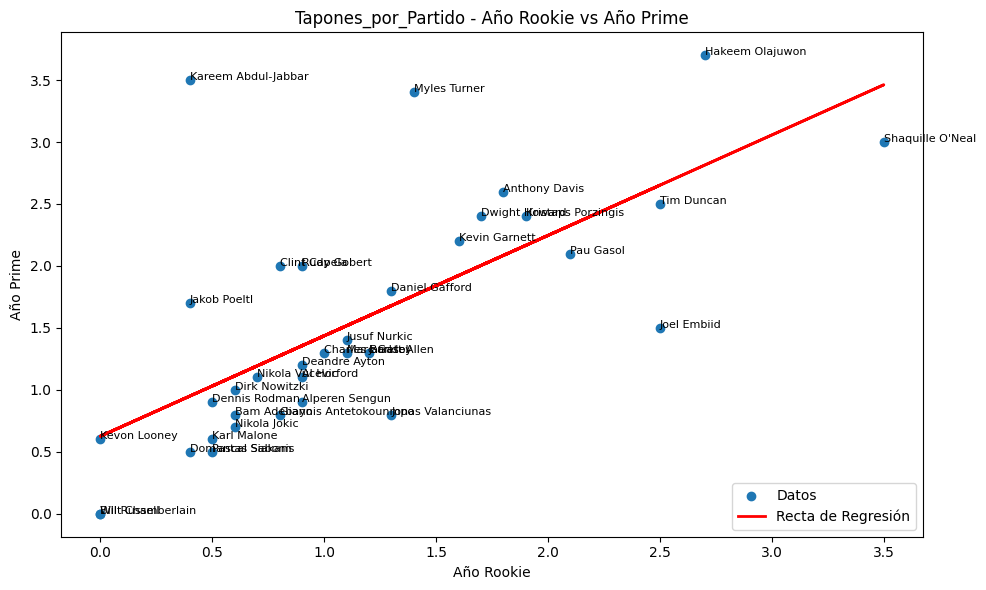

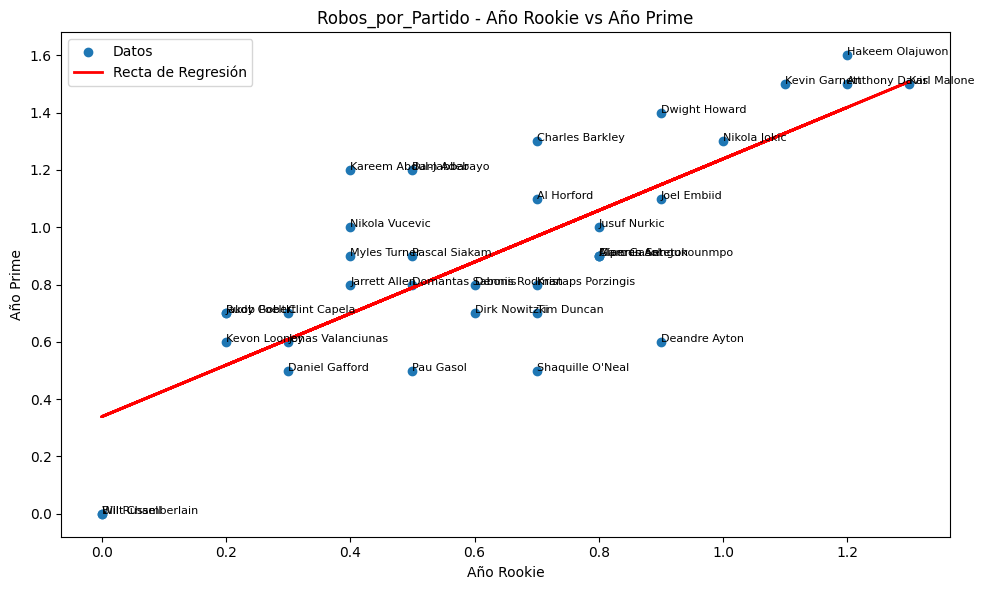

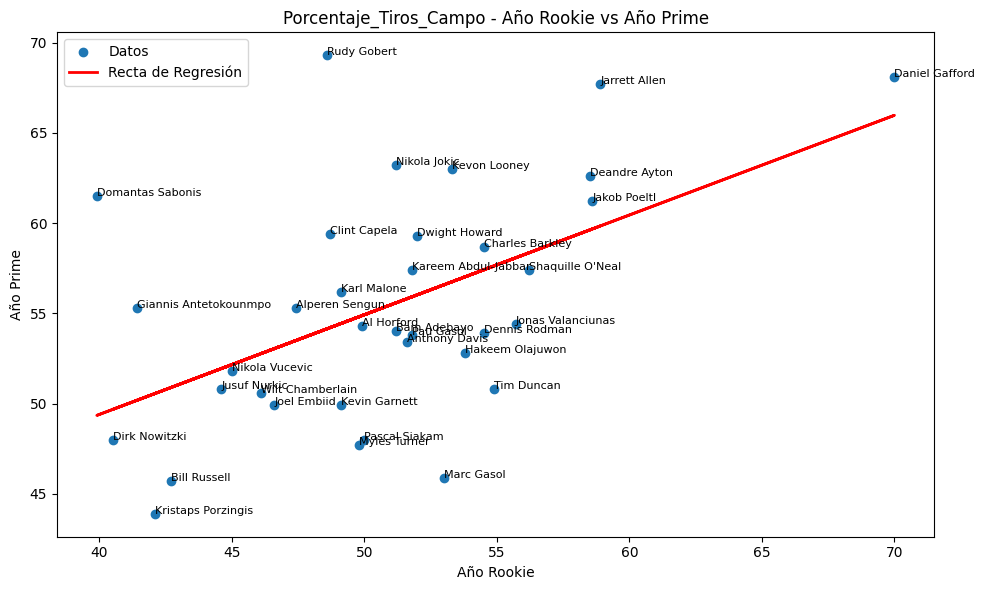

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Defino las estadísticas que quiero comparar
features = [
    "Puntos_por_Partido", 
    "Rebotes_por_Partido", 
    "Asistencias_por_Partido", 
    "Tapones_por_Partido", 
    "Robos_por_Partido", 
    "Porcentaje_Tiros_Campo"
]

# Itero sobre las estadísticas y creo una figura para cada scatter plot con recta de regresión
for feature in features:
    plt.figure(figsize=(10, 6))
    
    rookie_stats = pd.to_numeric(data[feature + "_rookie"], errors='coerce')
    best_stats = pd.to_numeric(data[feature + "_best"], errors='coerce')

    # Eliminar filas con valores NaN
    valid_indices = ~rookie_stats.isna() & ~best_stats.isna()
    rookie_stats = rookie_stats[valid_indices]
    best_stats = best_stats[valid_indices]
    player_names = data['Nombre'][valid_indices]

    # Crear el scatter plot
    plt.scatter(rookie_stats, best_stats, label="Datos")

    # Añadir nombres de jugadores
    for i, name in enumerate(player_names):
        plt.annotate(name, (rookie_stats.iloc[i], best_stats.iloc[i]), fontsize=8)

    # Calcular la recta de regresión
    slope, intercept, r_value, p_value, std_err = linregress(rookie_stats, best_stats)
    regression_line = slope * rookie_stats + intercept

    # Dibujar la recta de regresión
    plt.plot(rookie_stats, regression_line, color='red', linestyle='-', linewidth=2, label="Recta de Regresión")
    
    # Configurar título y etiquetas
    plt.title(f'{feature} - Año Rookie vs Año Prime')
    plt.xlabel("Año Rookie")
    plt.ylabel("Año Prime")

    # Añadir leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

Este código 📊 **genera gráficos de dispersión** para comparar estadísticas de rendimiento de jugadores de la NBA 🏀 entre su **año rookie** y su **mejor temporada**, añadiendo una **línea de regresión lineal** para analizar la relación entre estas estadísticas.

Primero, se **definen las estadísticas** a comparar, como **puntos**, **rebotes**, **asistencias**, **tapones**, **robos** y **porcentaje de tiros de campo** 📈. Luego, para cada estadística:

1. **Se convierten los datos a formato numérico** y se eliminan los **valores no válidos** 🚫.
2. **Se crea un gráfico de dispersión** con los valores del año rookie en el eje x y los del año prime en el eje y.
3. **Se anotan los nombres de los jugadores** en sus respectivos puntos 🏷️.

Posteriormente, se **calcula una línea de regresión** utilizando la función "linregress" de "scipy.stats", obteniendo la pendiente, el intercepto, y otros parámetros estadísticos 📉. Esta línea se añade al gráfico para mostrar la **tendencia lineal** de los datos 📐.

Finalmente, se configuran **títulos**, **etiquetas** y **leyendas** para el gráfico, y se muestra el resultado 🎨. Matemáticamente, el análisis incluye la **transformación de datos**, la **eliminación de valores NaN**, la **creación de gráficos de dispersión**, la **anotación de puntos**, y el **cálculo y visualización de una línea de regresión** que modela la relación entre las estadísticas del año rookie y del año prime. 📊🏀✨


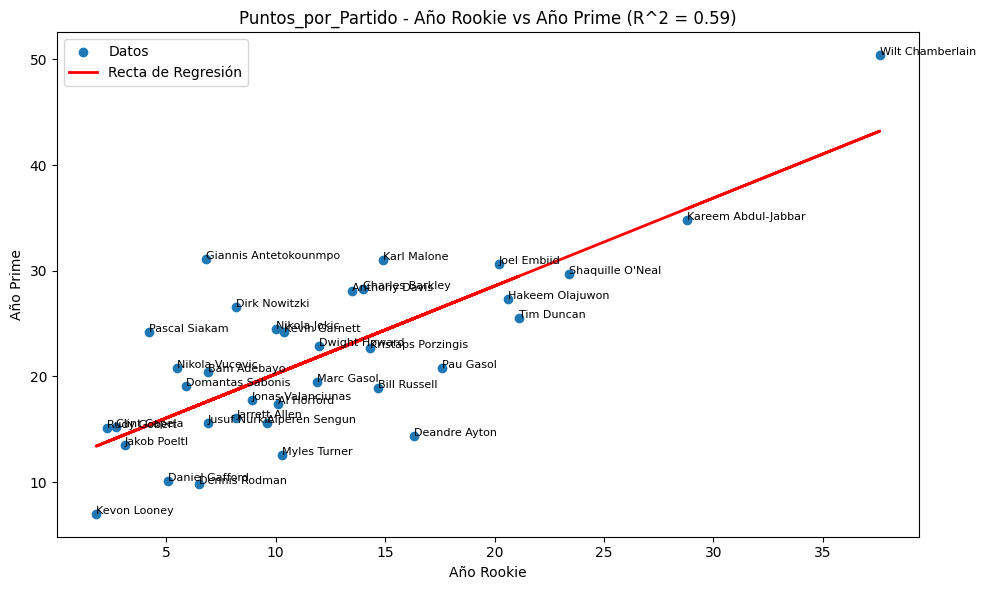

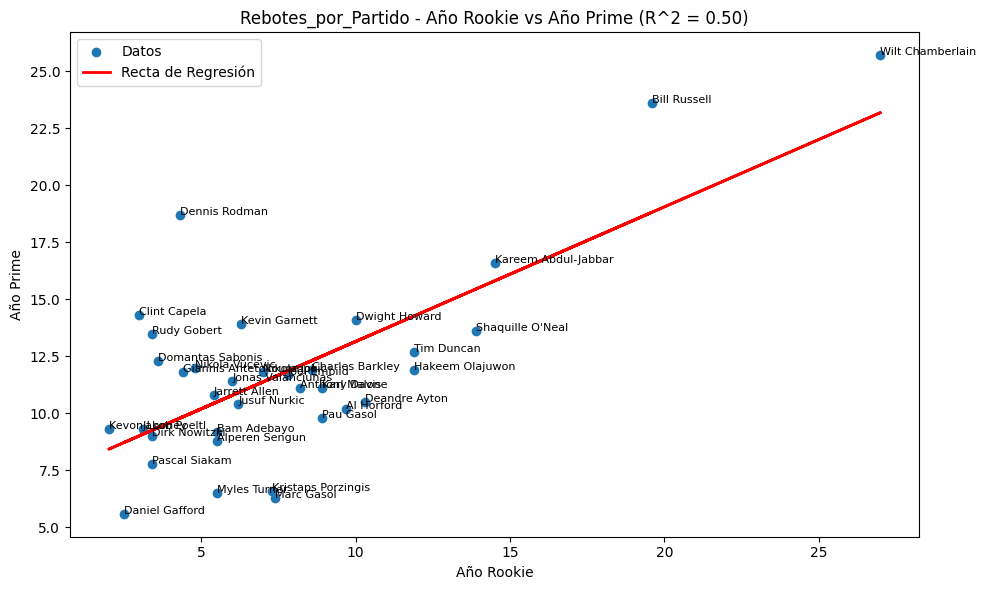

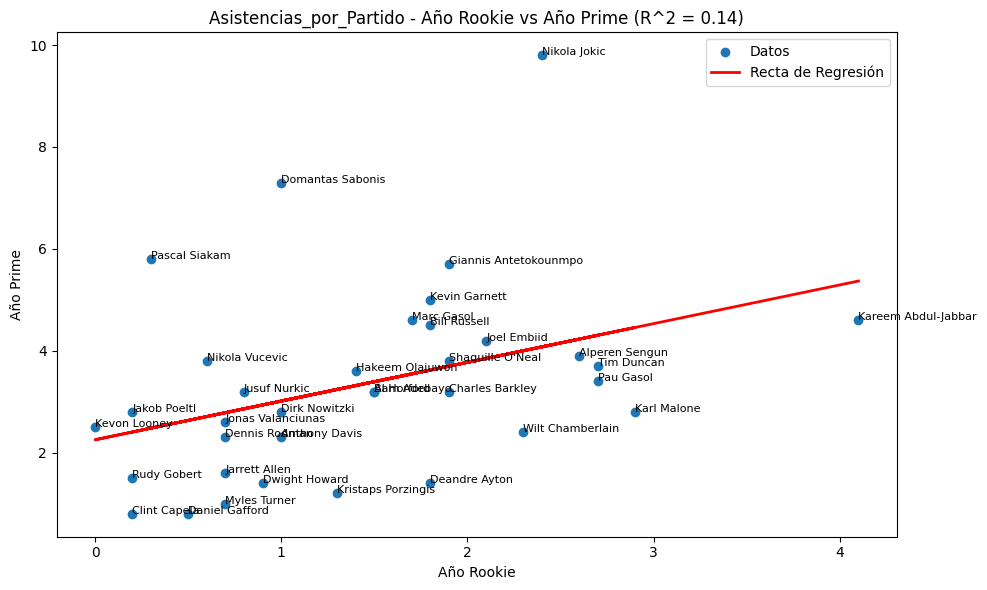

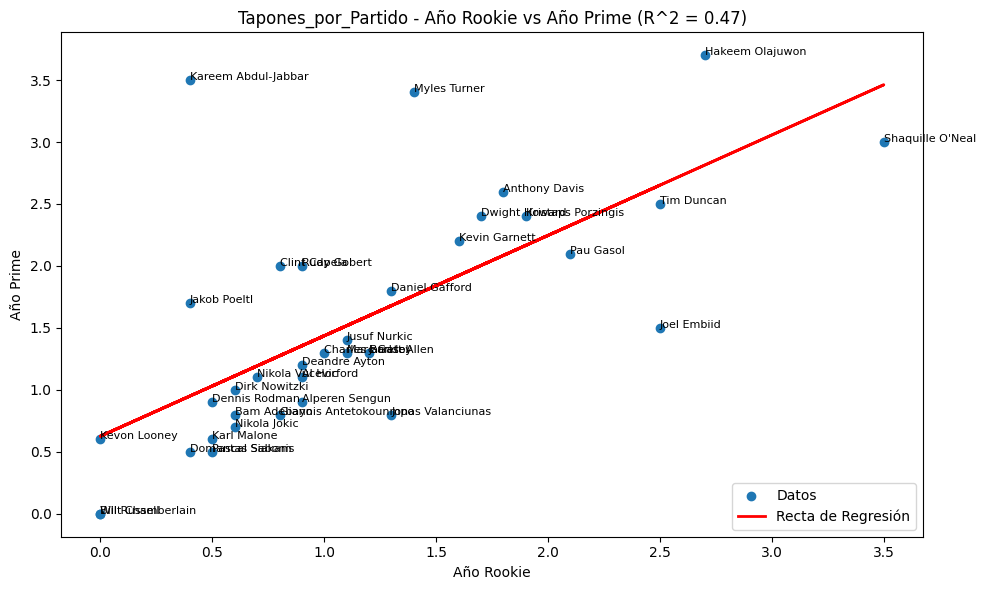

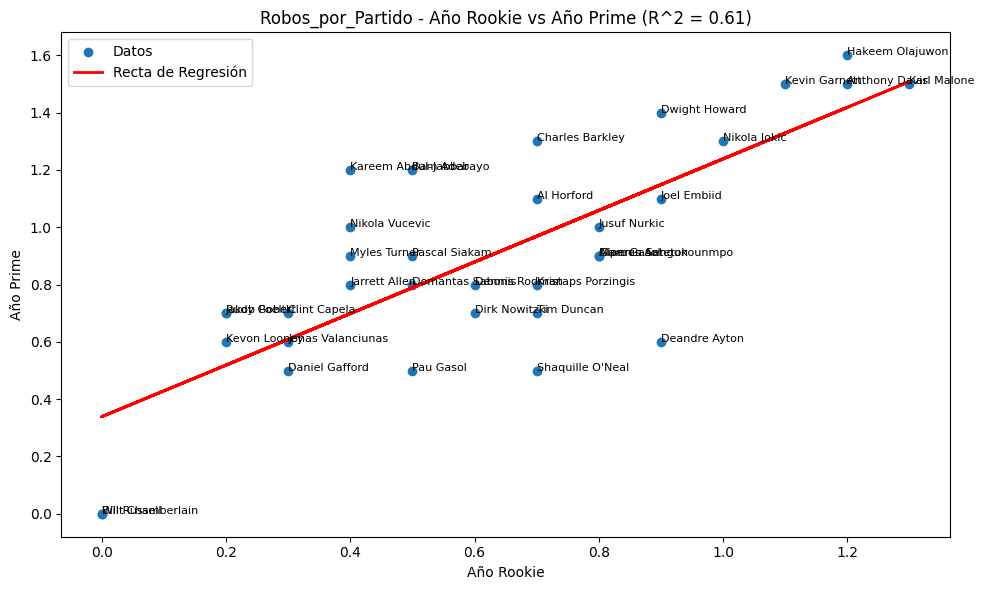

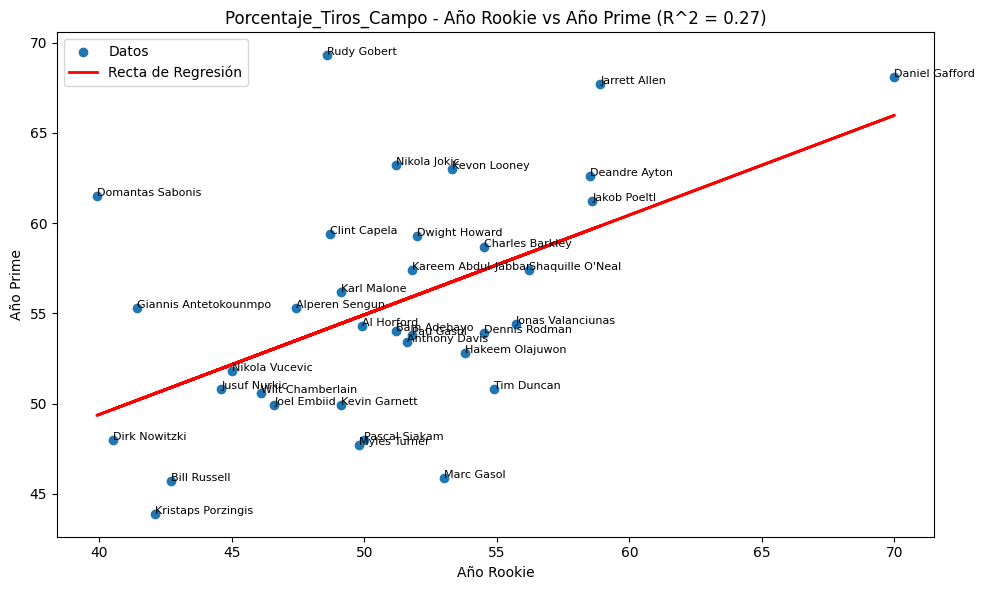

In [20]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

# Defino las estadísticas que quiero comparar
features = [
    "Puntos_por_Partido", 
    "Rebotes_por_Partido", 
    "Asistencias_por_Partido", 
    "Tapones_por_Partido", 
    "Robos_por_Partido", 
    "Porcentaje_Tiros_Campo"
]

# Itero sobre las estadísticas y creo una figura para cada scatter plot con recta de regresión
for feature in features:
    plt.figure(figsize=(10, 6))
    
    rookie_stats = pd.to_numeric(data[feature + "_rookie"], errors='coerce')
    best_stats = pd.to_numeric(data[feature + "_best"], errors='coerce')

    # Eliminar filas con valores NaN
    valid_indices = ~rookie_stats.isna() & ~best_stats.isna()
    rookie_stats = rookie_stats[valid_indices]
    best_stats = best_stats[valid_indices]
    player_names = data['Nombre'][valid_indices]

    # Crear el scatter plot
    plt.scatter(rookie_stats, best_stats, label="Datos")

    # Añadir nombres de jugadores
    for i, name in enumerate(player_names):
        plt.annotate(name, (rookie_stats.iloc[i], best_stats.iloc[i]), fontsize=8)

    # Calcular la recta de regresión
    slope, intercept, r_value, p_value, std_err = linregress(rookie_stats, best_stats)
    regression_line = slope * rookie_stats + intercept
    r_squared = r_value ** 2

    # Dibujar la recta de regresión
    plt.plot(rookie_stats, regression_line, color='red', linestyle='-', linewidth=2, label="Recta de Regresión")
    
    # Configurar título y etiquetas, incluyendo el coeficiente de determinación R^2
    plt.title(f'{feature} - Año Rookie vs Año Prime (R^2 = {r_squared:.2f})')
    plt.xlabel("Año Rookie")
    plt.ylabel("Año Prime")
    plt.legend()
    plt.tight_layout()
    plt.show()

En este código, calculamos el **coeficiente de determinación \( R^2 \)** 📉 como parte del análisis de regresión lineal. El valor de \( R^2 \) mide la **cantidad de variabilidad** en las estadísticas del año prime que puede ser **explicada por el modelo lineal** basado en las estadísticas del año rookie. Un \( R^2 \) cercano a 1 indica que el modelo se ajusta bien a los datos, mostrando una **fuerte relación lineal** entre las dos temporadas, mientras que un \( R^2 \) cercano a 0 sugiere que el modelo no explica bien la variabilidad de los datos.

En este caso, es probable que obtengamos **valores de \( R^2 \) bajos** debido a la **falta de datos** o a la **variabilidad natural en el rendimiento** de los jugadores. **Un \( R^2 \) bajo no necesariamente indica que no haya relación**, sino que puede reflejar que el modelo lineal no captura toda la complejidad del rendimiento a lo largo de las temporadas. Por lo tanto, **el \( R^2 \) es crucial para evaluar** la **calidad del ajuste** de la línea de regresión y entender cuán bien las estadísticas de rookie pueden predecir el rendimiento en la mejor temporada 🎯.


In [21]:
data.head()

Nombre Temporada_rookie          Equipo_rookie  \
player_id                                                                
1          Kareem Abdul-Jabbar          1969-70        Milwaukee Bucks   
2             Wilt Chamberlain          1959-60  Philadelphia Warriors   
3             Shaquille O'Neal          1992-93          Orlando Magic   
4              Hakeem Olajuwon          1984-85        Houston Rockets   
5                 Jusuf Nurkic          2014-15         Denver Nuggets   

           Puntos_por_Partido_rookie  Rebotes_por_Partido_rookie  \
player_id                                                          
1                               28.8                        14.5   
2                               37.6                        27.0   
3                               23.4                        13.9   
4                               20.6                        11.9   
5                                6.9                         6.2   

           Asistencias_por_Partido_rookie  Tapones_por_Partido_rookie  \
player_id                                                               
1                                     4.1                         0.4   
2                                     2.3                         0.0   
3                                     1.9                         3.5   
4                                     1.4                         2.7   
5                                     0.8                         1.1   

           Robos_por_Partido_rookie  Porcentaje_Tiros_Campo_rookie  \
player_id                                                            
1                               0.4                           51.8   
2                               0.0                           46.1   
3                               0.7                           56.2   
4                               1.2                           53.8   
5                               0.8                           44.6   

          Temporada_best             Equipo_best  Puntos_por_Partido_best  \
player_id                                                                   
1                1971-72         Milwaukee Bucks                     34.8   
2                1961-62   Philadelphia Warriors                     50.4   
3                1999-00      Los Angeles Lakers                     29.7   
4                1993-94         Houston Rockets                     27.3   
5                2018-19  Portland Trail Blazers                     15.6   

           Rebotes_por_Partido_best  Asistencias_por_Partido_best  \
player_id                                                           
1                              16.6                           4.6   
2                              25.7                           2.4   
3                              13.6                           3.8   
4                              11.9                           3.6   
5                              10.4                           3.2   

           Tapones_por_Partido_best  Robos_por_Partido_best  \
player_id                                                     
1                               3.5                     1.2   
2                               0.0                     0.0   
3                               3.0                     0.5   
4                               3.7                     1.6   
5                               1.4                     1.0   

           Porcentaje_Tiros_Campo_best  
player_id                               
1                                 57.4  
2                                 50.6  
3                                 57.4  
4                                 52.8  
5                                 50.8

In [22]:
features

['Puntos_por_Partido',
 'Rebotes_por_Partido',
 'Asistencias_por_Partido',
 'Tapones_por_Partido',
 'Robos_por_Partido',
 'Porcentaje_Tiros_Campo']

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

# Creo la lista de diccionarios con los modelos
model_list = [
    {"name": "Linear Regression", "model": LinearRegression()},
    {"name": "Ridge Regression", "model": Ridge(alpha=1.0)},
    {"name": "Lasso Regression", "model": Lasso(alpha=0.1)},
    {"name": "ElasticNet Regression", "model": ElasticNet(alpha=0.1, l1_ratio=0.5)},
    {"name": "Random Forest Regression", "model": RandomForestRegressor(random_state=42)},
    {"name": "Polynomial Regression Degree 2", "model": LinearRegression(), "poly_features": PolynomialFeatures(degree=2)},
    {"name": "Polynomial Regression Degree 3", "model": LinearRegression(), "poly_features": PolynomialFeatures(degree=3)}]

**Probamos diferentes regresores disponibles en "scikit-learn"** para determinar cuál ofrece **mejores resultados** en el análisis de los datos 📈. Dado que **disponemos de una cantidad limitada de datos**, no podemos permitirnos utilizar un conjunto de prueba separado. En su lugar, emplearemos **validación cruzada** para evaluar el desempeño de los modelos 🧪.

**La validación cruzada** es una técnica que nos permite **medir la capacidad de generalización** de los modelos utilizando todos los datos disponibles, sin necesidad de un conjunto de prueba separado. En este caso, voy a utilizar **validación cruzada con 5 pliegues** 🔄. Esto implica dividir el conjunto de datos en 5 partes iguales, y entrenar y validar el modelo en diferentes combinaciones de estos pliegues:

1. En cada iteración, **se utiliza 4 de los 5 pliegues** para entrenar el modelo.
2. El **pliegue restante** se usa para validar el modelo, proporcionando una medida de desempeño en datos **no vistos durante el entrenamiento**.

**El objetivo de la validación cruzada** es evaluar cómo se desempeña cada regresor en **datos no vistos**, proporcionando una estimación más robusta de su capacidad para generalizar a nuevos datos. Esto es especialmente importante cuando el conjunto de datos es pequeño, ya que permite utilizar toda la información disponible para el entrenamiento y la validación sin comprometer la calidad del análisis 🏅.

**En resumen**, dado el tamaño limitado del conjunto de datos, aplicar una **validación cruzada de 5 pliegues** nos ayuda a **evaluar de manera efectiva** el rendimiento de diferentes modelos de regresión, asegurando que las evaluaciones sean lo más representativas posible de cómo se comportarán en datos reales y no vistos 📊🔍.

In [24]:

def cross_validate_models(feature, model_list, use_all_features=False):

    results = []
    
    if use_all_features:
        feature_rookie = [x for x in data.columns if any(feature in x for feature in features) and "rookie" in x]
    else:
        feature_rookie = [feature + "_rookie"]

    feature_best = [feature + "_best"]

    print(feature_rookie)
    
    if len(feature_rookie) == 1:
        X = data[feature_rookie].values.reshape(-1, 1).astype(float)
    else:
        X = data[feature_rookie].values.astype(float)

    y = data[feature_best].values.astype(float).ravel()

    for model_dict in model_list:
        model = model_dict["model"]
        predictions = cross_val_predict(model, X, y, cv=5)
        r2 = r2_score(y, predictions)
        rmse = np.sqrt(mean_squared_error(y, predictions))
        mape = np.mean(np.abs((y - predictions) / np.maximum(np.abs(y), 1))) * 100

        results.append({"feature": feature, "Model": model_dict["name"], "R^2": r2, "RMSE": rmse, "MAPE": mape})

    data_results = pd.DataFrame(results)
    return data_results

    

In [25]:
cross_validate_models(features[0], model_list)

['Puntos_por_Partido_rookie']


feature                           Model       R^2      RMSE  \
0  Puntos_por_Partido               Linear Regression  0.524685  5.749308   
1  Puntos_por_Partido                Ridge Regression  0.524445  5.750757   
2  Puntos_por_Partido                Lasso Regression  0.523642  5.755612   
3  Puntos_por_Partido           ElasticNet Regression  0.523828  5.754489   
4  Puntos_por_Partido        Random Forest Regression -0.094285  8.723485   
5  Puntos_por_Partido  Polynomial Regression Degree 2  0.524685  5.749308   
6  Puntos_por_Partido  Polynomial Regression Degree 3  0.524685  5.749308   

        MAPE  
0  25.103786  
1  25.112055  
2  25.136327  
3  25.131605  
4  41.485877  
5  25.103786  
6  25.103786

In [26]:
cross_validate_models(features[0], model_list, True)

['Puntos_por_Partido_rookie', 'Rebotes_por_Partido_rookie', 'Asistencias_por_Partido_rookie', 'Tapones_por_Partido_rookie', 'Robos_por_Partido_rookie', 'Porcentaje_Tiros_Campo_rookie']


feature                           Model       R^2      RMSE  \
0  Puntos_por_Partido               Linear Regression  0.081325  7.992925   
1  Puntos_por_Partido                Ridge Regression  0.231923  7.308483   
2  Puntos_por_Partido                Lasso Regression  0.195030  7.481950   
3  Puntos_por_Partido           ElasticNet Regression  0.292541  7.014157   
4  Puntos_por_Partido        Random Forest Regression  0.065670  8.060743   
5  Puntos_por_Partido  Polynomial Regression Degree 2  0.081325  7.992925   
6  Puntos_por_Partido  Polynomial Regression Degree 3  0.081325  7.992925   

        MAPE  
0  29.096000  
1  27.918142  
2  28.589166  
3  27.482763  
4  32.400163  
5  29.096000  
6  29.096000

In [27]:
cross_validate_models(features[1], model_list)

['Rebotes_por_Partido_rookie']


feature                           Model       R^2      RMSE  \
0  Rebotes_por_Partido               Linear Regression  0.433763  3.153173   
1  Rebotes_por_Partido                Ridge Regression  0.433573  3.153703   
2  Rebotes_por_Partido                Lasso Regression  0.432356  3.157088   
3  Rebotes_por_Partido           ElasticNet Regression  0.432794  3.155869   
4  Rebotes_por_Partido        Random Forest Regression  0.310846  3.478620   
5  Rebotes_por_Partido  Polynomial Regression Degree 2  0.433763  3.153173   
6  Rebotes_por_Partido  Polynomial Regression Degree 3  0.433763  3.153173   

        MAPE  
0  22.298381  
1  22.294946  
2  22.285227  
3  22.287007  
4  25.304724  
5  22.298381  
6  22.298381

In [28]:
cross_validate_models(features[1], model_list, True)

['Puntos_por_Partido_rookie', 'Rebotes_por_Partido_rookie', 'Asistencias_por_Partido_rookie', 'Tapones_por_Partido_rookie', 'Robos_por_Partido_rookie', 'Porcentaje_Tiros_Campo_rookie']


feature                           Model       R^2      RMSE  \
0  Rebotes_por_Partido               Linear Regression  0.386748  3.281469   
1  Rebotes_por_Partido                Ridge Regression  0.418960  3.194123   
2  Rebotes_por_Partido                Lasso Regression  0.433445  3.154060   
3  Rebotes_por_Partido           ElasticNet Regression  0.440408  3.134617   
4  Rebotes_por_Partido        Random Forest Regression  0.256207  3.613888   
5  Rebotes_por_Partido  Polynomial Regression Degree 2  0.386748  3.281469   
6  Rebotes_por_Partido  Polynomial Regression Degree 3  0.386748  3.281469   

        MAPE  
0  21.644468  
1  20.914255  
2  20.797294  
3  20.728952  
4  25.446454  
5  21.644468  
6  21.644468

In [29]:
cross_validate_models(features[2], model_list)

['Asistencias_por_Partido_rookie']


feature                           Model       R^2  \
0  Asistencias_por_Partido               Linear Regression  0.013549   
1  Asistencias_por_Partido                Ridge Regression  0.015334   
2  Asistencias_por_Partido                Lasso Regression  0.006314   
3  Asistencias_por_Partido           ElasticNet Regression  0.011900   
4  Asistencias_por_Partido        Random Forest Regression -0.700369   
5  Asistencias_por_Partido  Polynomial Regression Degree 2  0.013549   
6  Asistencias_por_Partido  Polynomial Regression Degree 3  0.013549   

       RMSE       MAPE  
0  1.840118  52.849562  
1  1.838451  53.082610  
2  1.846853  54.257257  
3  1.841655  53.876703  
4  2.415902  77.591086  
5  1.840118  52.849562  
6  1.840118  52.849562

In [30]:
cross_validate_models(features[2], model_list, True)

['Puntos_por_Partido_rookie', 'Rebotes_por_Partido_rookie', 'Asistencias_por_Partido_rookie', 'Tapones_por_Partido_rookie', 'Robos_por_Partido_rookie', 'Porcentaje_Tiros_Campo_rookie']


feature                           Model       R^2  \
0  Asistencias_por_Partido               Linear Regression -0.113716   
1  Asistencias_por_Partido                Ridge Regression -0.038213   
2  Asistencias_por_Partido                Lasso Regression  0.027889   
3  Asistencias_por_Partido           ElasticNet Regression  0.028809   
4  Asistencias_por_Partido        Random Forest Regression -0.301135   
5  Asistencias_por_Partido  Polynomial Regression Degree 2 -0.113716   
6  Asistencias_por_Partido  Polynomial Regression Degree 3 -0.113716   

       RMSE       MAPE  
0  1.955217  55.608661  
1  1.887778  54.161346  
2  1.826693  52.691610  
3  1.825829  52.583753  
4  2.113337  71.402952  
5  1.955217  55.608661  
6  1.955217  55.608661

In [31]:
cross_validate_models(features[3], model_list)

['Tapones_por_Partido_rookie']


feature                           Model       R^2      RMSE  \
0  Tapones_por_Partido               Linear Regression  0.409772  0.731326   
1  Tapones_por_Partido                Ridge Regression  0.413227  0.729183   
2  Tapones_por_Partido                Lasso Regression  0.397658  0.738793   
3  Tapones_por_Partido           ElasticNet Regression  0.404914  0.734330   
4  Tapones_por_Partido        Random Forest Regression  0.098470  0.903840   
5  Tapones_por_Partido  Polynomial Regression Degree 2  0.409772  0.731326   
6  Tapones_por_Partido  Polynomial Regression Degree 3  0.409772  0.731326   

        MAPE  
0  32.523619  
1  33.105536  
2  35.408854  
3  34.833001  
4  43.297421  
5  32.523619  
6  32.523619

In [32]:
cross_validate_models(features[3], model_list, True)

['Puntos_por_Partido_rookie', 'Rebotes_por_Partido_rookie', 'Asistencias_por_Partido_rookie', 'Tapones_por_Partido_rookie', 'Robos_por_Partido_rookie', 'Porcentaje_Tiros_Campo_rookie']


feature                           Model       R^2      RMSE  \
0  Tapones_por_Partido               Linear Regression -0.194353  1.040321   
1  Tapones_por_Partido                Ridge Regression  0.021433  0.941665   
2  Tapones_por_Partido                Lasso Regression  0.234880  0.832657   
3  Tapones_por_Partido           ElasticNet Regression  0.183534  0.860142   
4  Tapones_por_Partido        Random Forest Regression  0.218140  0.841716   
5  Tapones_por_Partido  Polynomial Regression Degree 2 -0.194353  1.040321   
6  Tapones_por_Partido  Polynomial Regression Degree 3 -0.194353  1.040321   

        MAPE  
0  42.202544  
1  39.494197  
2  38.020869  
3  38.839483  
4  33.215999  
5  42.202544  
6  42.202544

In [33]:
cross_validate_models(features[4], model_list)

['Robos_por_Partido_rookie']


feature                           Model       R^2      RMSE  \
0  Robos_por_Partido               Linear Regression  0.562159  0.250782   
1  Robos_por_Partido                Ridge Regression  0.528543  0.260231   
2  Robos_por_Partido                Lasso Regression -0.022589  0.383257   
3  Robos_por_Partido           ElasticNet Regression  0.265929  0.324719   
4  Robos_por_Partido        Random Forest Regression  0.563241  0.250472   
5  Robos_por_Partido  Polynomial Regression Degree 2  0.562159  0.250782   
6  Robos_por_Partido  Polynomial Regression Degree 3  0.562159  0.250782   

        MAPE  
0  19.298137  
1  18.958696  
2  25.883903  
3  22.147326  
4  17.714904  
5  19.298137  
6  19.298137

In [34]:
cross_validate_models(features[4], model_list, True)

['Puntos_por_Partido_rookie', 'Rebotes_por_Partido_rookie', 'Asistencias_por_Partido_rookie', 'Tapones_por_Partido_rookie', 'Robos_por_Partido_rookie', 'Porcentaje_Tiros_Campo_rookie']


feature                           Model       R^2      RMSE  \
0  Robos_por_Partido               Linear Regression  0.112993  0.356946   
1  Robos_por_Partido                Ridge Regression  0.329980  0.310229   
2  Robos_por_Partido                Lasso Regression -0.151073  0.406621   
3  Robos_por_Partido           ElasticNet Regression  0.136511  0.352182   
4  Robos_por_Partido        Random Forest Regression  0.431142  0.285852   
5  Robos_por_Partido  Polynomial Regression Degree 2  0.112993  0.356946   
6  Robos_por_Partido  Polynomial Regression Degree 3  0.112993  0.356946   

        MAPE  
0  23.768325  
1  22.902857  
2  29.956902  
3  26.898567  
4  18.738452  
5  23.768325  
6  23.768325

In [35]:
cross_validate_models(features[5], model_list)

['Porcentaje_Tiros_Campo_rookie']


feature                           Model       R^2      RMSE  \
0  Porcentaje_Tiros_Campo               Linear Regression  0.115108  6.036725   
1  Porcentaje_Tiros_Campo                Ridge Regression  0.115044  6.036945   
2  Porcentaje_Tiros_Campo                Lasso Regression  0.114564  6.038582   
3  Porcentaje_Tiros_Campo           ElasticNet Regression  0.114746  6.037960   
4  Porcentaje_Tiros_Campo        Random Forest Regression -0.241269  7.149724   
5  Porcentaje_Tiros_Campo  Polynomial Regression Degree 2  0.115108  6.036725   
6  Porcentaje_Tiros_Campo  Polynomial Regression Degree 3  0.115108  6.036725   

        MAPE  
0   8.755028  
1   8.756648  
2   8.764314  
3   8.761930  
4  10.374264  
5   8.755028  
6   8.755028

In [36]:
cross_validate_models(features[5], model_list, True)

['Puntos_por_Partido_rookie', 'Rebotes_por_Partido_rookie', 'Asistencias_por_Partido_rookie', 'Tapones_por_Partido_rookie', 'Robos_por_Partido_rookie', 'Porcentaje_Tiros_Campo_rookie']


feature                           Model       R^2      RMSE  \
0  Porcentaje_Tiros_Campo               Linear Regression -0.423716  7.657165   
1  Porcentaje_Tiros_Campo                Ridge Regression -0.306137  7.334166   
2  Porcentaje_Tiros_Campo                Lasso Regression -0.257599  7.196603   
3  Porcentaje_Tiros_Campo           ElasticNet Regression -0.232298  7.123840   
4  Porcentaje_Tiros_Campo        Random Forest Regression -0.165998  6.929553   
5  Porcentaje_Tiros_Campo  Polynomial Regression Degree 2 -0.423716  7.657165   
6  Porcentaje_Tiros_Campo  Polynomial Regression Degree 3 -0.423716  7.657165   

        MAPE  
0  11.091205  
1  10.614360  
2  10.457605  
3  10.316797  
4  10.228817  
5  11.091205  
6  11.091205

En el análisis de modelos de regresión, **se observa que los modelos que utilizan únicamente una sola variable del año rookie** suelen ofrecer **mejores resultados** en comparación con aquellos que utilizan **todas las estadísticas del año rookie** 📊.

**¿Por qué sucede esto?** Cuando se incorporan **todas las estadísticas del año rookie** en el modelo, se introduce una **cantidad significativa de ruido** 📉. Esto se debe a que las diferentes estadísticas, como **puntos por partido**, **rebotes**, **asistencias**, **tapones**, **robos** y **porcentaje de tiros de campo**, no están necesariamente **correlacionadas entre sí**. La falta de correlación entre estas variables puede llevar a que el modelo **incorpore información irrelevante o redundante**, lo cual puede afectar negativamente su capacidad para hacer predicciones precisas.

Por otro lado, **utilizar una sola variable** del año rookie que esté **fuertemente correlacionada** con el rendimiento en la mejor temporada puede **simplificar el modelo** y reducir el **ruido**. Esto permite al modelo **enfocarse en una medida específica** que tiene una **relación más directa** con el resultado deseado, lo que puede mejorar su capacidad para hacer **predicciones más precisas y confiables** 🎯.

**En resumen**, los modelos que emplean una sola variable del año rookie suelen superar a aquellos que utilizan todas las estadísticas de ese año. Esto se debe a que el uso de múltiples estadísticas no correlacionadas puede introducir **ruido adicional** en el modelo, mientras que concentrarse en una variable relevante **simplifica el análisis** y mejora la **calidad de las predicciones** 📈🔍.

In [37]:
victor_future = {}

In [38]:
model_Puntos_por_Partido = LinearRegression()
model_Puntos_por_Partido.fit(data["Puntos_por_Partido_rookie"].values.reshape(-1, 1).astype(float),data["Puntos_por_Partido_best"].values.astype(float).ravel())
victor_future["Puntos_por_Partido"] = model_Puntos_por_Partido.predict(victor["Puntos_por_Partido"].values.reshape(-1, 1).astype(float))[0]

In [39]:
model_Rebotes_por_Partido = LinearRegression()
model_Rebotes_por_Partido.fit(data["Rebotes_por_Partido_rookie"].values.reshape(-1, 1).astype(float),data["Rebotes_por_Partido_best"].values.astype(float).ravel())
victor_future["Rebotes_por_Partido"] = model_Rebotes_por_Partido.predict(victor["Rebotes_por_Partido"].values.reshape(-1, 1).astype(float))[0]

In [40]:
model_Asistencias_por_Partido = LinearRegression()
model_Asistencias_por_Partido.fit(data["Asistencias_por_Partido_rookie"].values.reshape(-1, 1).astype(float),data["Asistencias_por_Partido_best"].values.astype(float).ravel())
victor_future["Asistencias_por_Partido"] = model_Asistencias_por_Partido.predict(victor["Asistencias_por_Partido"].values.reshape(-1, 1).astype(float))[0]

In [41]:
model_Tapones_por_Partido = LinearRegression()
model_Tapones_por_Partido.fit(data["Tapones_por_Partido_rookie"].values.reshape(-1, 1).astype(float),data["Tapones_por_Partido_best"].values.astype(float).ravel())
victor_future["Tapones_por_Partido"] = model_Tapones_por_Partido.predict(victor["Tapones_por_Partido"].values.reshape(-1, 1).astype(float))[0]

In [42]:
model_robos_por_partido = RandomForestRegressor(random_state=42)
model_robos_por_partido.fit(data["Robos_por_Partido_rookie"].values.reshape(-1, 1).astype(float),data["Robos_por_Partido_best"].values.astype(float).ravel())
victor_future["Robos_por_Partido"] = model_robos_por_partido.predict(victor["Robos_por_Partido"].values.reshape(-1, 1).astype(float))[0]

In [43]:
model_Porcentaje_Tiros_Campo = Lasso(alpha=0.1)
model_Porcentaje_Tiros_Campo.fit(data["Porcentaje_Tiros_Campo_rookie"].values.reshape(-1, 1).astype(float),data["Porcentaje_Tiros_Campo_best"].values.astype(float).ravel())
victor_future["Porcentaje_Tiros_Campo"] = model_Porcentaje_Tiros_Campo.predict(victor["Porcentaje_Tiros_Campo"].values.reshape(-1, 1).astype(float))[0]

In [44]:
victor_future

{'Puntos_por_Partido': 27.72672617250823,
 'Rebotes_por_Partido': 12.561380703679095,
 'Asistencias_por_Partido': 3.7728463063200426,
 'Tapones_por_Partido': 3.0568324395426494,
 'Robos_por_Partido': 1.5152666666666663,
 'Porcentaje_Tiros_Campo': 53.28158840350342}

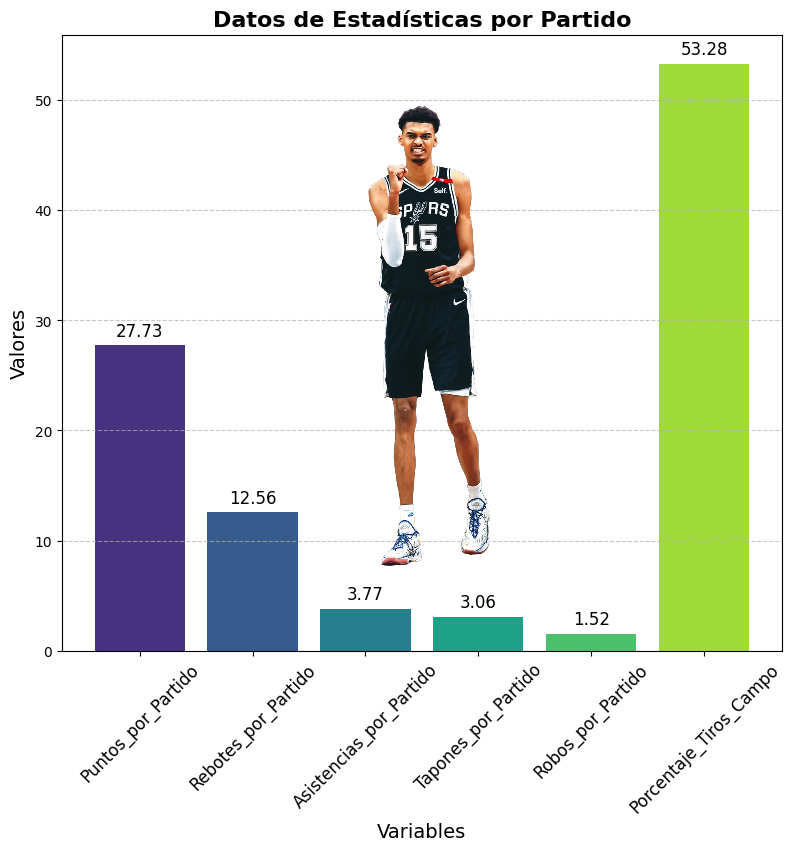

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Preparar los datos
variables = list(victor_future.keys())
valores = list(victor_future.values())

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el gráfico de barras
bars = ax.bar(variables, valores, color=sns.color_palette("viridis", len(variables)))

# Añadir etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha="center", va="bottom", fontsize=12)

# Título y etiquetas
ax.set_title("Datos de Estadísticas por Partido", fontsize=16, fontweight="bold")
ax.set_xlabel("Variables", fontsize=14)
ax.set_ylabel("Valores", fontsize=14)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Cargar la imagen
img = mpimg.imread('images/wembanyama.png')

imagebox = OffsetImage(img, zoom=0.3) 
ab = AnnotationBbox(imagebox, (0.51, 0.51), frameon=False, xycoords='axes fraction', boxcoords="axes fraction", pad=0.1)
ax.add_artist(ab)

# Ajustar el espacio para la imagen
plt.subplots_adjust(left=0.3) 
plt.show()